<a href="https://colab.research.google.com/github/Yug-Oswal/DataScience/blob/main/EDA(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing and setting up kaggle for downloading iris dataset
from google.colab import files
import os
import shutil

uploaded = files.upload()

# Defining path
fname = list(uploaded.keys())[0]

path = os.path.join(f'{os.getcwd()}', f'{fname}')

# Moving to /root/.kaggle/kaggle.json

topath = os.path.join('/root', '.kaggle')
try:
  os.makedirs(topath)
except FileExistsError:
  pass

shutil.move(path, os.path.join(topath, 'kaggle.json'))

Saving kaggle.json to kaggle.json


'/root/.kaggle/kaggle.json'

In [ ]:
# Importing kaggle now that kaggle api is set up; Warning ignored bcuz it is a virtual env
import kaggle

In [ ]:
# Downloading the dataset
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 11.3MB/s]


In [ ]:
# Changing perms due to repeated warnings
!chmod 600 "{os.path.join(topath, 'kaggle.json')}"

In [ ]:
# Defining dataset zip path and Extracting
import zipfile
zip_ref = zipfile.ZipFile('/content/iris.zip')
zip_ref.extractall('/content/iris')
zip_ref.close()

# Checking contents
os.listdir('/content/iris')

['Iris.csv', 'database.sqlite']

In [ ]:
# Defining path to dataset
iris_path = os.path.join('/content/iris', 'Iris.csv')

In [ ]:
# Importing required libs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
# Creation of the dataframe object
iris = pd.read_csv(iris_path)

In [ ]:
# Checking features, datapoints, etc
print(iris.shape)

(150, 6)


In [ ]:
# Checking features and labels
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
# Checking id column
print(iris['Id'].value_counts())

1      1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Id, Length: 150, dtype: int64


In [ ]:
# Id feature column is redundant; therefore dropping
iris = iris.drop('Id', axis = 1)

In [ ]:
# Species identified as labels; Checking values
print(iris['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


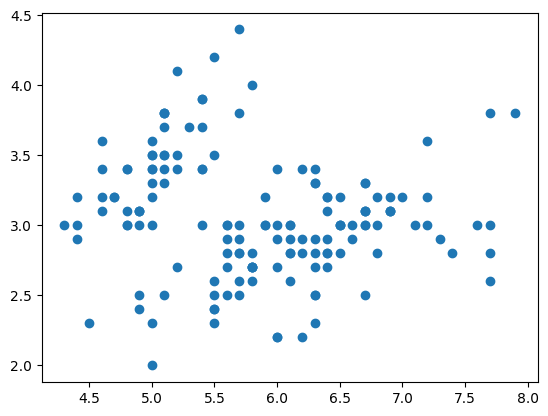

In [ ]:
# 2D Scatter Plot
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'])

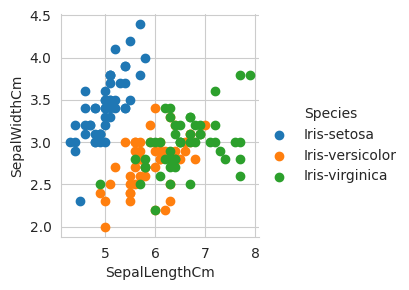

In [ ]:
# Colouring the scatterplot
sns.set_style("whitegrid")
grid = sns.FacetGrid(iris, hue = 'Species')
grid.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')
grid.add_legend()
plt.show()

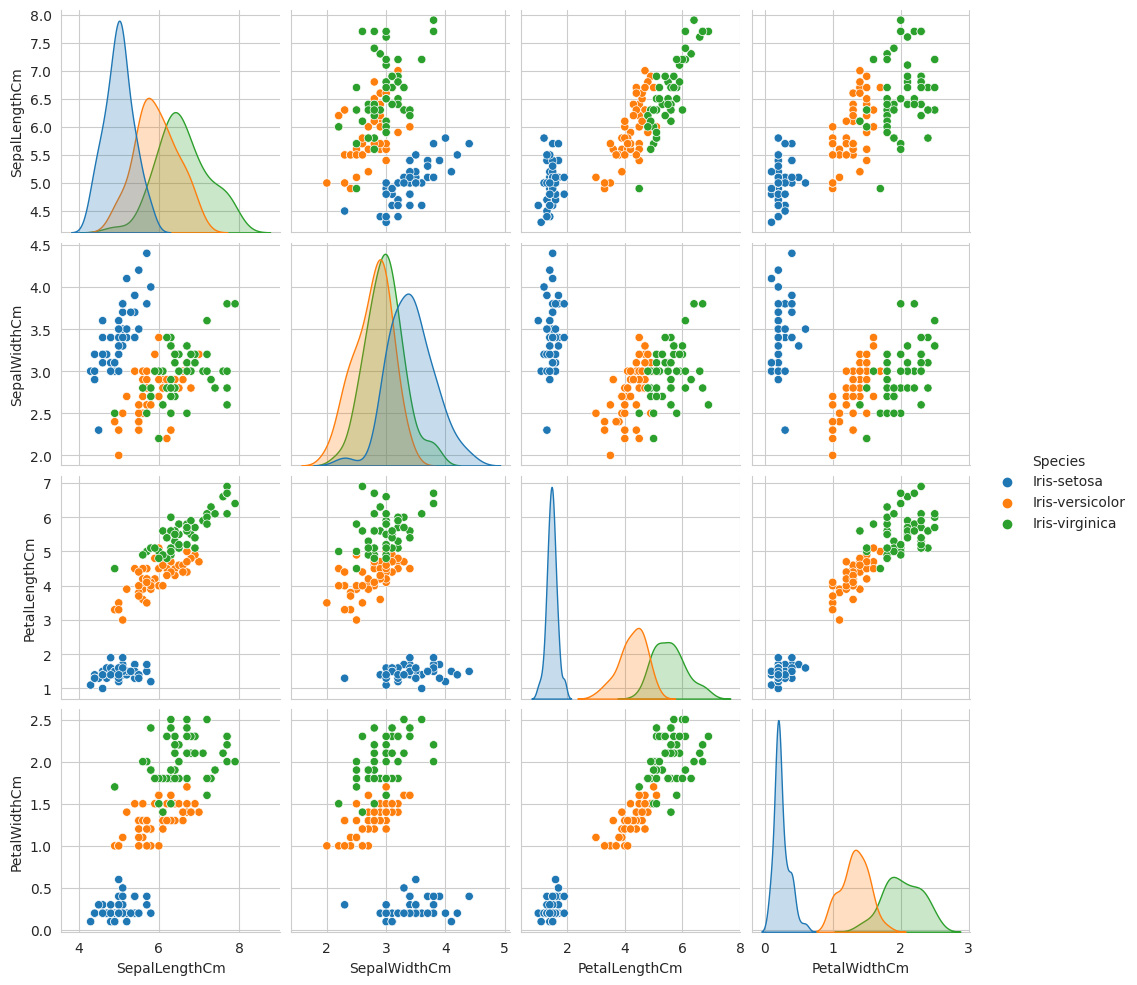

In [ ]:
# Generating pair-plots to visualize 4D features; (After verification that dimensionality is relatively less)
sns.set_style("whitegrid")
sns.pairplot(iris, hue = 'Species')
plt.show()

In [ ]:
# Generating 1D Scatter Plots for Iris
iris_setosa = iris[iris['Species'] == 'Iris-setosa']
iris_versicolor = iris[iris['Species'] == 'Iris-versicolor']
iris_virginica = iris[iris['Species'] == 'Iris-virginica']

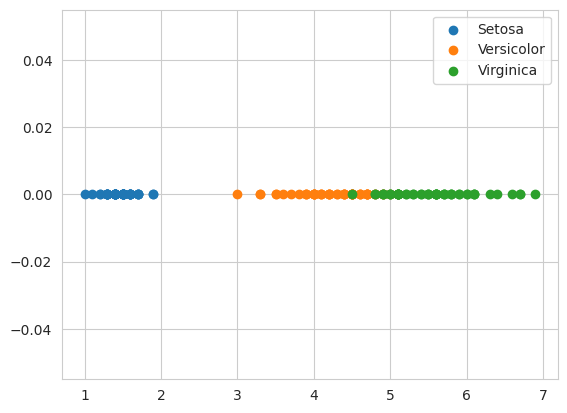

In [ ]:
# Plotting wrt Petal Length
plt.scatter(iris_setosa['PetalLengthCm'], np.zeros(iris_setosa.shape[0]), label = "Setosa")
plt.scatter(iris_versicolor['PetalLengthCm'], np.zeros(iris_setosa.shape[0]), label = "Versicolor")
plt.scatter(iris_virginica['PetalLengthCm'], np.zeros(iris_setosa.shape[0]), label = "Virginica")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

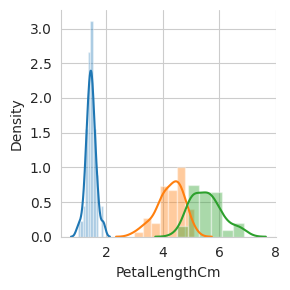

In [ ]:
# Constructing a Distribution Plot/Histogram for the generated 1D Scatter Plot
sns.set_style("whitegrid")
grid = sns.FacetGrid(iris, hue = 'Species')
grid.map(sns.distplot, 'PetalLengthCm')
plt.show()

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

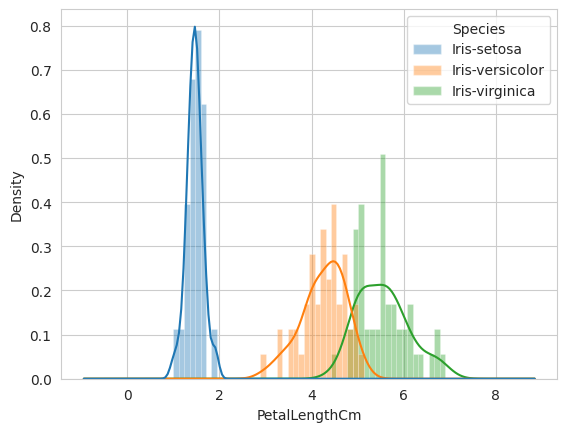

In [ ]:
# Replicating the distplot with new functions; with kde = kernel density estimation; PDF = Probability Density Functions
# PDF = Smoothed Histograms
sns.set_style("whitegrid")
sns.histplot(iris, x = 'PetalLengthCm', stat = "density", kde = True, kde_kws = dict(cut = 3), hue = 'Species', bins = 50, alpha = .4, edgecolor = (1, 1, 1, .4))

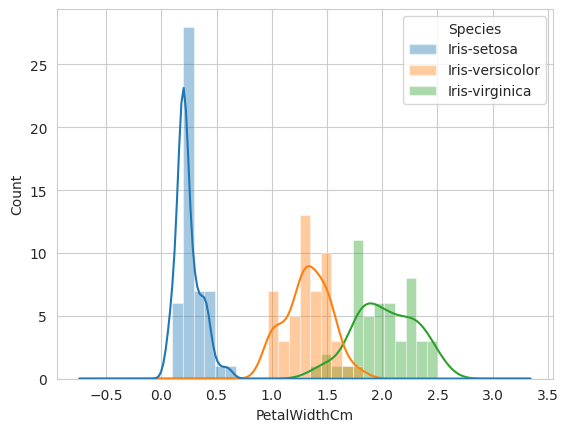

In [ ]:
# Generating PDFs for all the remaining features

# First, for Petal Width; with increased bins
sns.set_style("whitegrid")
sns.histplot(iris, x = 'PetalWidthCm', kde = True, kde_kws = dict(cut = 3), hue = 'Species', bins = 25, alpha = .4, edgecolor = (1, 1, 1, .4))
plt.show()

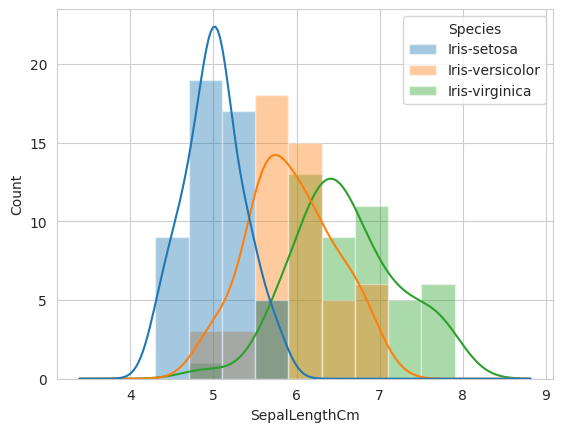

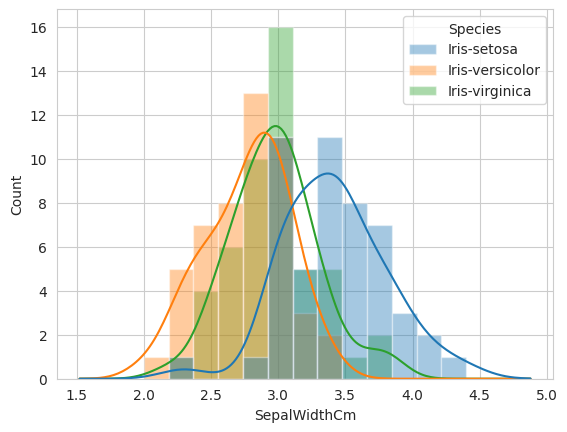

In [ ]:
# Second for, Sepal Width and Sepal Length; No increased bins due to high overlap
sns.set_style("whitegrid")
sns.histplot(iris, x = 'SepalLengthCm', kde = True, kde_kws = dict(cut = 3), hue = 'Species', alpha = .4, edgecolor = (1, 1, 1, .4))
plt.show()

sns.set_style("whitegrid")
sns.histplot(iris, x = 'SepalWidthCm', kde = True, kde_kws = dict(cut = 3), hue = 'Species', alpha = .4, edgecolor = (1, 1, 1, .4))
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


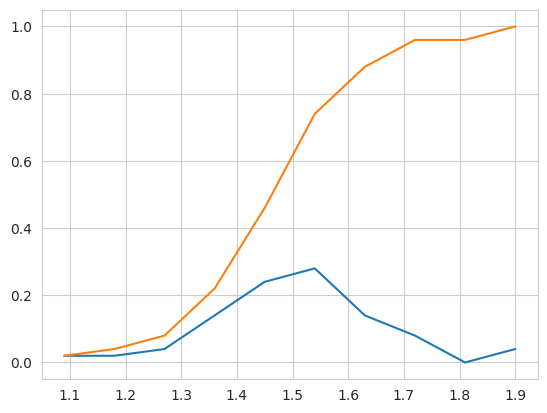

In [ ]:
# CDF = Cumulative Distribution Function
# Describes the percentage of the total number of data points of the label which exists from on and before a particular point
# Integration (Area under curve) of PDF gives CDF and diff. of CDF gives PDF

# Plotting CDF and corresponding PDF for iris setosa dataset
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins = 10, density = True)

# Computing PDF (proper one; as a fraction)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)

# Computing the corresponding CDF and plotting both
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


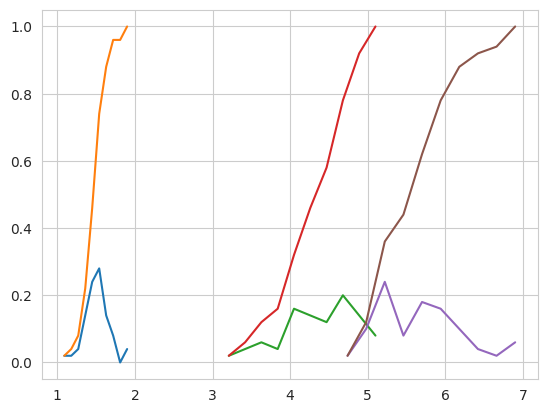

In [ ]:
# Plotting CDF and PDF for all 3 species
def plotcdf(array):
  counts, bin_edges = np.histogram(array, bins = 10, density = True)

  # Computing PDF (proper one; as a fraction)
  pdf = counts / (sum(counts))
  print(pdf)
  print(bin_edges)

  # Computing the corresponding CDF and plotting both
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:], pdf)
  plt.plot(bin_edges[1:], cdf)

plotcdf(iris_setosa['PetalLengthCm'])
plotcdf(iris_versicolor['PetalLengthCm'])
plotcdf(iris_virginica['PetalLengthCm'])
plt.show()

In [ ]:
# Mean, Variance and Std-deviation

# Mean = simple average of all values; Central Tendency
# Mean for all species
print("Mean:")
print(np.mean(iris_setosa['PetalLengthCm']))
print(np.mean(iris_versicolor['PetalLengthCm']))
print(np.mean(iris_virginica['PetalLengthCm']))

Mean:
1.464
4.26
5.5520000000000005


In [ ]:
# Outlier - an observation which is outside the norm set by the majority of data points
# Mean with an outlier would be like:
print("Mean with an outlier:")
print(np.mean(np.append(iris_setosa['PetalLengthCm'], 50)))

# Mean can be drastically different if computed normally due to the existence of outlier(s)

Mean with an outlier:
2.4156862745098038


In [ ]:
# Variance - Finding spread (the variation of from points from the central tendency or mean)
# Variance = Avg of (sum of(sq of(distance of each point from the mean value)))
# Standard deviation = sq. root of variance

print("Standard Deviation:")
print(np.std(iris_setosa['PetalLengthCm']))
print(np.std(iris_versicolor['PetalLengthCm']))
print(np.std(iris_virginica['PetalLengthCm']))

# However, the existence of an outlier can still corrupt the variance and std-dev

Standard Deviation:
0.17176728442867112
0.4651881339845203
0.546347874526844


In [ ]:
# Alternatives for mean - median; It does not get corrupted with an outlier
print("Median:")
print(np.median(iris_setosa['PetalLengthCm']))
print("Median with an outlier for setosa:")
print(np.median(iris_setosa['PetalLengthCm']))
print(np.median(iris_versicolor['PetalLengthCm']))
print(np.median(iris_virginica['PetalLengthCm']))

# Median calculated by:
# 1. Sort them in ascending or descending
# 2. Pick the middle value (For odd, directly pick middle value; For even, take average of middle 2 values)
# 3. Declare the picked value as median

# Thus, a median does not get corrupted as long as there are only a small number of outliers
# If half or more than half points are corrupted, only then is median affected. Otherwise, it's still pretty good.

Median:
1.5
Median with an outlier for setosa:
1.5
4.35
5.55


In [ ]:
# Percentiles and Quantiles
# Percentile is the percentage of elements which come before that value in a sorted array
# Quantiles are: 25, 50, 75, 100th Percentiles
# Other than quantiles 95th and 99th percentile can also give important observations
# 50th Percentile is median

print("90th Percentile:")
print(np.percentile(iris_setosa['PetalLengthCm'], 90))
print(np.percentile(iris_versicolor['PetalLengthCm'], 90))
print(np.percentile(iris_virginica['PetalLengthCm'], 90))

print("\nQuantiles")
print(np.percentile(iris_setosa['PetalLengthCm'], np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor['PetalLengthCm'], np.arange(0, 100, 25)))
print(np.percentile(iris_virginica['PetalLengthCm'], np.arange(0, 100, 25)))

90th Percentile:
1.7
4.8
6.31

Quantiles
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]


In [ ]:
# Median Absolute Deviation (same notion as Std-dev) = median(absolute deviation of each points from the median = |x - median| )
# Inter Quartile Range (IQR): difference between 2 quartiles.
# Eg. 75th percentile - 25th percentile: the value range in which 50% of elements exist

# Importing required libs
from statsmodels import robust

print("Median Absolute Deviation: ")
print(robust.mad(iris_setosa['PetalLengthCm']))
print(robust.mad(iris_versicolor['PetalLengthCm']))
print(robust.mad(iris_virginica['PetalLengthCm']))

Median Absolute Deviation: 
0.14826022185056031
0.5189107764769602
0.6671709983275211


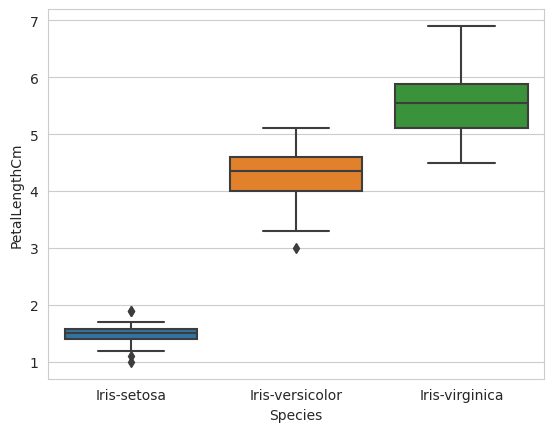

In [ ]:
# Box Plot and Whiskers - Put concept of Quantiles into plot forms
# 1st, 2nd, 3rd lines of each box correspond to 25th, 50th, 75th percentiles of that class; width has no significance
# Whiskers: No standard way to draw whiskers (the top and bottom horizontal lines in the 'T' structure)
# 1 way is to draw at min and max values
# seaborn puts whiskers at 1.5 x IQR value (75th - 25th percentile value); but a bit more complicated
# Most points lie within whiskers, regardless of the way we plot them

sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.show()

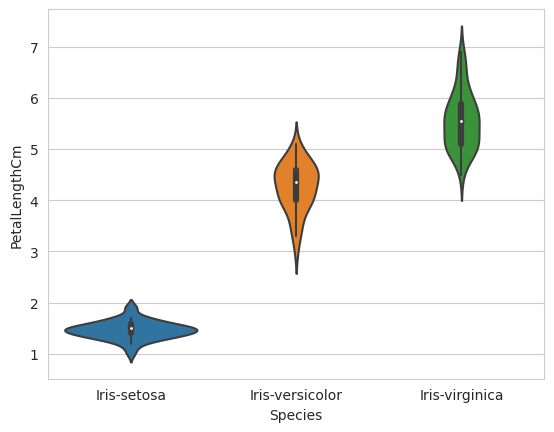

In [ ]:
# Violin plot - combines pdfs (hists) and box plots

sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.show()

### Data Science Advice
*   Any interpretations or conclusions reached after a data analysis operation to be put after the analysis in an observation/conclusion tab in simple english.
*   Never forget the objective (problem being solved). Perform all EDA aligned with objectives. Irrelevant conclusions or interpretations may also be reached, but may not be necessary.




In [ ]:
# Line : w1x1 + w2x2 + w0 = 0 (ax + by + c = 0)
# Plane = w1x1 + w2x2 + w3x3 + w0
# Hyperplane eqn = (w0 + w.x) or (w1x1 + w2x2 + ... + wnxn + w0) (This is found from the generalization of plane eqn of 2D and 3D space in nD)
# Plane eqn is depicted with the symbol pi_subscript(n); n for n-dim space
# Dot product: np.dot(w, x) = matrix_multiplication(transpose(w), x); all vectors, if nothing is given explicitly, are taken as column vectors.
# Column vectors of n-dim shape: (n, 1); Row vecs: (1, n)
# For a hyperplane thru origin: w.x = 0; This means that, for a plane thru origin, w is vector perpendicular to vector x which consists of points
# xi which all lie in the plane. Thus, w is vector perpendicular to hyperplane.

In [ ]:
# Distance of point from a plane:
# distance = (transpose(w) x P) / | w |  ; P = vector depicting the point to find the distance from
# Any (n - 1)D plane in an nD space will divide the the space into 2 halves. These are known as half spaces.
# For all points in 1 half-space, all distances will be +ve since they lie in the same direction as w.
# The distances will be -ve for all points in the other half-space.

In [ ]:
# Dimensionality Reduction
# D = {xi, yi}_subcript(i = 1)_superscript(n); n = no. of data points
# xi e R_superscript(d); d = dimension of default column vector xi (data points)
# (R is written with 2 vertical lines to show that it is Real Space, not Real Number set)
# yi e {set of labels}; yi is class-labels

In [ ]:
# Dataset as data-matrix:
# Each column = feature 'f' of xi (f goes from 1 to d) (d = dimension of x)
# Each row = transpose(xi) (i goes from 1 to n) (n = no. of data points)
# The above was (n, d) matrix shape
# Each column = xi (column vector) (n columns)
# Each row = feature 'f' of xi (from 1 to d)
# The above was (d, n) matrix shape

In [1]:
# Data preprocessing: Feature normalisation
# For each feature fi (i = 1 to d) d = dimension of x;
# fi = fi - min/ max - min
# Here, min is the minimum value of all the values feature fi takes on throughout xj (j = 1 to n); n = no. of data points
# Similarly, max is the same.
# This squeezes all the points, regardless of where they are in nD space, into a hypercuboid at the origin
# However, this doesn't affect the relationship of each point with one another

In [ ]:
# Mean of a Data Matrix
# Mean-vector
# x_abovex(bar) = 1/n Sum(i = 1 to n)xi; here, xi = vector, xbar = mean vector
